In [21]:
import os
import statistics
import scipy as sp
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin
%matplotlib inline

In [2]:
os.chdir('C:\\Users\\rafal\\Desktop\\dane do licencjatu\\data')
data = pd.read_csv('danelic2019.csv',sep=';',engine='python')
data05 =  pd.read_csv('danelic2017.csv',sep=';',engine='python')
data1 = pd.read_csv('danelic2018.csv',sep=';',engine='python')
#data15 = pd.read_csv('danelic2020.csv',sep=';',engine='python')
data1=pd.DataFrame.append(data,data1)
data1=pd.DataFrame.append(data1,data05,ignore_index=True)
#data1=pd.DataFrame.append(data1,data15,ignore_index=True)
data1.sort_values('player')

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,Column1,Unnamed: 0
466,546.0,Aaron Connolly,ie IRL,FW,Brighton,19.0,2000.0,4000000.0,175.0,Forward - Centre-Forward,...,54.5,-13.3,-0.35,22369,0.0,0.0,0.0,201920#,NaN,NaN
7066,NaN,Aaron Cresswell,eng ENG,DF,West Ham,27.0,1989.0,12000000.0,170.0,Defender - Left-Back,...,57.8,-20.5,-0.54,56885,0.0,0.0,0.0,201718#,NaN,574.0
4691,NaN,Aaron Cresswell,eng ENG,DF,West Ham,28.0,1989.0,10000000.0,170.0,Defender - Left-Back,...,61.0,-11.9,-0.31,58336,0.0,0.0,0.0,201819#,542.0,NaN
2576,582.0,Aaron Cresswell,eng ENG,DF,West Ham,29.0,1989.0,6000000.0,170.0,Defender - Left-Back,...,61.1,-14.8,-0.39,44155,0.0,0.0,NaN,201920#,NaN,NaN
5688,NaN,Aaron Hunt,de GER,"MF,FW",Hamburger SV,30.0,1986.0,1500000.0,183.0,midfield - Attacking Midfield,...,52.7,-15.7,-0.46,50656,0.0,0.0,0.0,201718#,NaN,1120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [3]:
#adding dummy variables to dataset
data1 = pd.get_dummies(data1, columns=['league'])
data1 = data1.rename({"league_Bundesliga":"isBundesliga",
                                "league_La Liga":"isLaLiga",
                                "league_Premier League":"isPremierLeague",
                                "league_Ligue 1":"isLigue1",
                                "league_Serie A":"isSerieA"},axis='columns')
data1=pd.get_dummies(data1,columns=['Season'])
#deleting potential outliers that actually contribute nothing
data1=data1[data1['value']>1000000]
data1=data1[data1['games']>5]
data1=data1[data1['age']>0]
data1=data1[data1['height']>0]
data1

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Column1,Unnamed: 0,isBundesliga,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#
0,21.0,Martin Aguirregabiria,es ESP,DF,AlavÄ‚Â©s,23.0,1996.0,4000000.0,178.0,Defender - Right-Back,...,NaN,NaN,0,1,0,0,0,0,0,1
1,390.0,Oliver Burke,sco SCO,"MF,FW",AlavÄ‚Â©s,22.0,1997.0,4000000.0,188.0,Forward - Right Winger,...,NaN,NaN,0,1,0,0,0,0,0,1
2,430.0,VÄ‚Â­ctor Camarasa,es ESP,MF,AlavÄ‚Â©s,25.0,1994.0,4000000.0,183.0,Midfielder - Central Midfield,...,NaN,NaN,0,1,0,0,0,0,0,1
3,737.0,RubÄ‚Â©n Duarte,es ESP,DF,AlavÄ‚Â©s,23.0,1995.0,4000000.0,172.0,Defender - Left-Back,...,NaN,NaN,0,1,0,0,0,0,0,1
5,826.0,Ljubomir Fejsa,rs SRB,MF,AlavÄ‚Â©s,30.0,1988.0,2000000.0,183.0,Midfielder - Defensive Midfield,...,NaN,NaN,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7094,NaN,Mario GĂłmez,de GER,FW,Wolfsburg,32.0,1985.0,6000000.0,189.0,attack - Centre-Forward,...,NaN,942.0,1,0,0,0,0,1,0,0
7095,NaN,Josuha Guilavogui,fr FRA,MF,Wolfsburg,26.0,1990.0,7000000.0,188.0,midfield - Defensive Midfield,...,NaN,1004.0,1,0,0,0,0,1,0,0
7102,NaN,Divock Origi,be BEL,FW,Wolfsburg,22.0,1995.0,10000000.0,185.0,attack - Centre-Forward,...,NaN,1859.0,1,0,0,0,0,1,0,0
7104,NaN,Renato Steffen,ch SUI,"FW,MF",Wolfsburg,25.0,1991.0,3500000.0,170.0,attack - Right Winger,...,NaN,2367.0,1,0,0,0,0,1,0,0


In [4]:
#GOALKEEPERS
dataGK = data1[data1['position2']=='Goalkeeper']
dataGK

,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Column1,Unnamed: 0,isBundesliga,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#
18,1871.0,Fernando Pacheco,es ESP,GK,AlavÄ‚Â©s,27.0,1992.0,14000000.0,186.0,Goalkeeper,...,NaN,NaN,0,1,0,0,0,0,0,1
87,1401.0,Bernd Leno,de GER,GK,Arsenal,27.0,1992.0,28000000.0,190.0,Goalkeeper,...,NaN,NaN,0,0,0,1,0,0,0,1
92,1568.0,Emiliano MartÄ‚Â­nez,ar ARG,GK,Arsenal,26.0,1992.0,2000000.0,195.0,Goalkeeper,...,NaN,NaN,0,0,0,1,0,0,0,1
116,1067.0,Tom Heaton,eng ENG,GK,Aston Villa,33.0,1986.0,4000000.0,188.0,Goalkeeper,...,NaN,NaN,0,0,0,1,0,0,0,1
127,1812.0,Ä‚Â�rjan Nyland,no NOR,GK,Aston Villa,28.0,1990.0,1200000.0,192.0,Goalkeeper,...,NaN,NaN,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,NaN,Orestis Karnezis,gr GRE,GK,Watford,32.0,1985.0,3000000.0,190.0,Goalkeeper,...,NaN,1257.0,0,0,0,1,0,1,0,0
7045,NaN,Ben Foster,eng ENG,GK,West Brom,34.0,1983.0,3000000.0,193.0,Goalkeeper,...,NaN,837.0,0,0,0,1,0,1,0,0
7060,NaN,AdriĂˇn,es ESP,GK,West Ham,30.0,1987.0,5000000.0,190.0,Goalkeeper,...,NaN,19.0,0,0,0,1,0,1,0,0
7071,NaN,Joe Hart,eng ENG,GK,West Ham,30.0,1987.0,10000000.0,196.0,Goalkeeper,...,NaN,1048.0,0,0,0,1,0,1,0,0


In [5]:
dataGK_cor = dataGK.corr()
show=pd.Series(dataGK_cor['value'])
pd.set_option('display.max_rows', None)
show.sort_values(ascending=False)

value                                     1.000000
wins_gk                                   0.627296
clean_sheets                              0.592735
Pts                                       0.543694
W                                         0.536030
Pts/G                                     0.508688
GDiff                                     0.481860
clean_sheets_pct                          0.453678
CL                                        0.452052
xGDiff                                    0.442045
xGDiff/90                                 0.429264
GF                                        0.395911
xG                                        0.374104
passes_ground                             0.359026
passes_completed_medium                   0.358269
passes_medium                             0.357153
games                                     0.354514
games_starts                              0.353394
minutes_90s                               0.353081
minutes                        

In [8]:
def ln(x):
    return np.log(x) + 1.

#dataGK['test']=dataGK['W']/dataGK['MP']

#Creating a linear regression
trainGK, testGK = train_test_split(dataGK, train_size=0.8)
modelGK=smf.ols('value~age+games_starts+psxg_gk+passes_pct_launched_gk+psnpxg_per_shot_on_target_against+wins_gk'
                  '+isPremierLeague+isLaLiga+isBundesliga+isSerieA+isLigue1+clean_sheets:minutes+xGA',data=dataGK)
resultsGK=modelGK.fit()
resultsGK_params=resultsGK.params
#Creating a robust regression
modelGKrobust=sm.RLM(modelGK.endog,modelGK.exog,data=trainGK).fit()
#r2_wls = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit().rsquared
#modelGKrobustridge = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit_regularized(alpha=0.2, L1_wt=0,start_params=resultsGK_params)
#print(modelGKrobust.summary(),
      #"R^2:", r2_wls)
finalGK1 = sm.regression.linear_model.OLSResults(modelGK, 
                                              modelGKrobust.params, 
                                              modelGK.normalized_cov_params)
finalGK1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     34.43
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           5.22e-47
Time:                        18:04:28   Log-Likelihood:                -4817.8
No. Observations:                 274   AIC:                             9662.
Df Residuals:                     261   BIC:                             9709.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          3.178e+07   8.62e+06      3.689      0.000    1.48e+07    4.87e+07
age                               -1.378e+06   1.86e+05     -7.388      0.000   -1.74e+06   -1.01e+06
games_starts                      -8.612e+04   2.51e+05     -0.343      0.732   -5.81e+05    4.09e+05
psxg_gk                           -1.177e+05   1.36e+05     -0.864      0.388   -3.86e+05     1.5e+05
passes_pct_launched_gk             2.729e+05   1.04e+05      2.614      0.009    6.73e+04    4.79e+05
psnpxg_per_shot_on_target_against  -3.75e+07   1.91e+07     -1.961      0.051   -7.52e+07    1.58e+05
wins_gk                            1.095e+06    2.1e+05      5.201      0.000     6.8e+05    1.51e+06
isPremierLeague                    1.415e+07   2.35e+06      6.011      0.000    9.51e+06    1.88e+07
isLaLiga                           8.545e+06   2.23e+06      3.833      0.000    4.16e+06    1.29e+07
isBundesliga                       3.699e+06   2.28e+06      1.624      0.106   -7.87e+05    8.18e+06
isSerieA                           5.268e+06   2.16e+06      2.438      0.015    1.01e+06    9.52e+06
isLigue1                           1.202e+05   2.03e+06      0.059      0.953   -3.88e+06    4.12e+06
clean_sheets:minutes                230.2600     96.816      2.378      0.018      39.619     420.901
xGA                               -6635.2328   1.06e+05     -0.063      0.950   -2.15e+05    2.02e+05
==============================================================================
Omnibus:                      155.714   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1130.489
Skew:                           2.231   Prob(JB):                    3.29e-246
Kurtosis:                      11.894   Cond. No.                     1.86e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.95e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
#Creating a robust ridge regression
modelGKrobustridge = sm.WLS(modelGK.endog, modelGK.exog, weights=modelGKrobust.weights).fit_regularized(alpha=0.2, L1_wt=0,start_params=resultsGK_params)

finalGK2 = sm.regression.linear_model.OLSResults(modelGK, 
                                              modelGKrobustridge.params, 
                                              modelGK.normalized_cov_params)
finalGK2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     28.02
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           2.48e-40
Time:                        18:04:48   Log-Likelihood:                -4834.4
No. Observations:                 274   AIC:                             9695.
Df Residuals:                     261   BIC:                             9742.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          6.787e+05   9.15e+06      0.074      0.941   -1.73e+07    1.87e+07
age                               -9.444e+05   1.98e+05     -4.768      0.000   -1.33e+06   -5.54e+05
games_starts                         3.3e+05   2.67e+05      1.236      0.218   -1.96e+05    8.56e+05
psxg_gk                           -4.266e+05   1.45e+05     -2.951      0.003   -7.11e+05   -1.42e+05
passes_pct_launched_gk             2.936e+05   1.11e+05      2.647      0.009    7.52e+04    5.12e+05
psnpxg_per_shot_on_target_against   6.69e+04   2.03e+07      0.003      0.997   -3.99e+07    4.01e+07
wins_gk                            1.111e+06   2.24e+05      4.970      0.000    6.71e+05    1.55e+06
isPremierLeague                    3.532e+06    2.5e+06      1.412      0.159   -1.39e+06    8.46e+06
isLaLiga                           8.489e+05   2.37e+06      0.358      0.720   -3.82e+06    5.51e+06
isBundesliga                      -1.011e+06   2.42e+06     -0.418      0.676   -5.78e+06    3.75e+06
isSerieA                           -3.54e+05    2.3e+06     -0.154      0.878   -4.87e+06    4.17e+06
isLigue1                          -2.337e+06   2.16e+06     -1.083      0.280   -6.59e+06    1.91e+06
clean_sheets:minutes                231.4266    102.856      2.250      0.025      28.894     433.959
xGA                                2.731e+05   1.12e+05      2.428      0.016    5.17e+04    4.95e+05
==============================================================================
Omnibus:                      146.883   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              904.525
Skew:                           2.141   Prob(JB):                    3.85e-197
Kurtosis:                      10.803   Cond. No.                     1.86e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.95e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
#VIF 
vif = pd.DataFrame()
vif["features"] = modelGK.exog_names
vif["VIF Factor"] = [variance_inflation_factor(finalGK1.model.exog, i) for i in range(finalGK1.model.exog.shape[1])]
vif

C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF Factor
0,Intercept,0.000000
1,age,1.100443
2,games_starts,14.073031
3,psxg_gk,9.662039
4,passes_pct_launched_gk,1.676848
5,psnpxg_per_shot_on_target_against,2.083606
6,wins_gk,4.289230
7,isPremierLeague,inf
8,isLaLiga,inf
9,isBundesliga,inf


In [11]:
#testing
#Breusch-Pagan
bptestGK=sm.stats.diagnostic.het_breuschpagan(resultsGK.resid, resultsGK.model.exog)
bptestGK

(59.40614086407453,
 6.707080030103095e-08,
 6.021064950303192,
 2.755336425639376e-09)

In [12]:
#autocorrelation
sm.stats.stattools.durbin_watson(resultsGK.resid)

1.8936749385075822

In [13]:
#Chowtest
trainGK1=trainGK[trainGK['Season_201819#']==0]
trainGK2=trainGK[trainGK['Season_201819#']==1]
JGK = len(resultsGK.params)-1 #number of coefficients
N1GK = trainGK1.shape[0]
N2GK = trainGK2.shape[0]
RSSdGK=resultsGK.ssr
resultsGKridge1=smf.ols('value~age+psxg_gk+games_starts+passes_pct_launched_gk+pct_goal_kicks_launched'
                  '+isPremierLeague+isLaLiga+isLigue1+clean_sheets+saves',data=trainGK1).fit_regularized(alpha=0.2, L1_wt=0.01,refit=True)
RSSbGK=resultsGKridge1.ssr
kGK = len(resultsGKridge1.params)-1
resultsGKridge2=smf.ols('value~age+psxg_gk+games_starts+passes_pct_launched_gk+pct_goal_kicks_launched'
                  '+isPremierLeague+isLaLiga+isLigue1+clean_sheets+saves',data=trainGK2).fit_regularized(alpha=0.2, L1_wt=0.01,refit=True)
RSSnbGK = resultsGKridge2.ssr
ChowGK=((RSSdGK-(RSSbGK+RSSnbGK))/JGK)/((RSSbGK+RSSnbGK)/(N1GK+N2GK-2*kGK))
pGK=sp.stats.f.cdf(ChowGK, JGK, N1GK+N2GK-2*kGK)
print(ChowGK,pGK,JGK)

6.25892934901883 0.9999999992092957 13


In [15]:
#endogeneity
from statsmodels.sandbox.regression.gmm import IV2SLS
resultsGKridgeendog=IV2SLS(resultsGK.model.endog, resultsGK.model.exog, instrument=dataGK['minutes']).fit()
resultsGKridgeendog.summary()
resultsGKridgeendog.spec_hausman()

C:\Users\rafal\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1817: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


(-107744.80009773352, 1.0, 13)

<AxesSubplot:>

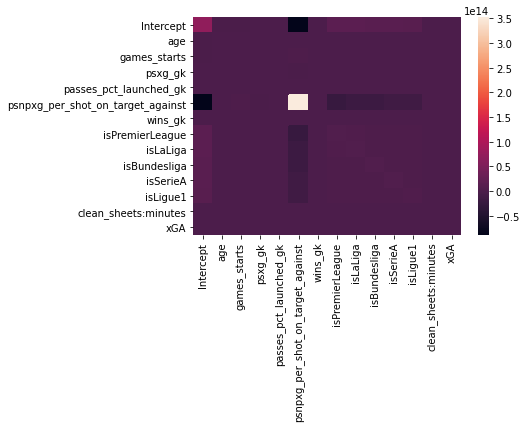

In [16]:
#correlation matrix
sm.regression.linear_model.RegressionResults.cov_params(resultsGK)
sns.heatmap(sm.regression.linear_model.RegressionResults.cov_params(resultsGK),annot=False,fmt='g')
#dataGK_cor = dataGK.corr()

In [17]:
#evaluating predictions
predictionsGK=finalGK1.predict(dataGK)
GKpredtrain=finalGK1.predict(trainGK)
GKpredtest=finalGK1.predict(testGK)
rmsetrainGK=sm.tools.eval_measures.rmse(trainGK['value'],GKpredtrain)
rmsetestGK=sm.tools.eval_measures.rmse(testGK['value'],GKpredtest)
print(rmsetrainGK,rmsetestGK)

9757444.402683442 12932615.97179693


In [22]:
#cross validation
class SMWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    def __init__(self, model_class, fit_intercept=True):
        self.model_class = model_class
        self.fit_intercept = fit_intercept
    def fit(self, X, y):
        if self.fit_intercept:
            X = sm.add_constant(X)
        self.model_ = self.model_class(y, X)
        self.results_ = self.model_.fit()
    def predict(self, X):
        if self.fit_intercept:
            X = sm.add_constant(X)
        return self.results_.predict(X)
    
print(cross_val_score(SMWrapper(sm.OLS), modelGK.exog, modelGK.endog, scoring='neg_mean_squared_error'))

[-1.56255297e+14 -1.68889411e+14 -1.04196402e+14 -7.91096423e+13
 -7.46069964e+13]


In [23]:
#some dope plots and other stuff
#multicollinearity
np.linalg.cond(resultsGK.model.exog)

1.8568004289305156e+20

<AxesSubplot:>

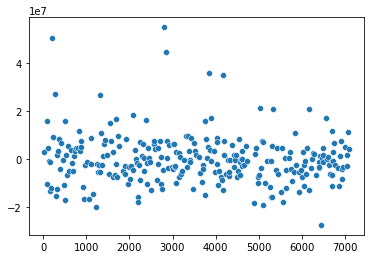

In [24]:
sns.scatterplot(data=resultsGK.resid)

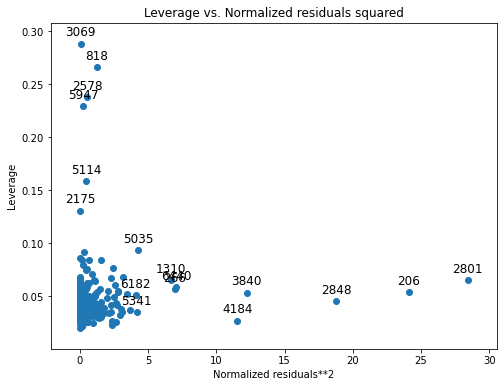

In [25]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(resultsGK, ax = ax)

In [26]:
#Actual predictions
dataGK['preds']=predictionsGK
dataseason1920=dataGK[dataGK['Season_201920#']==1]
dataGK.sort_values('preds',ascending=False)[0:25]

<ipython-input-26-3aaae1124682>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataGK['preds']=predictionsGK


,ď»żColumn1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Unnamed: 0,isBundesliga,isLaLiga,isLigue1,isPremierLeague,isSerieA,Season_201718#,Season_201819#,Season_201920#,preds
3819,NaN,Ederson,br BRA,GK,Manchester City,24.0,1993.0,70000000.0,188.0,Goalkeeper,...,NaN,0,0,0,1,0,0,1,0,5.855019e+07
3757,NaN,Alisson,br BRA,GK,Liverpool,25.0,1992.0,80000000.0,191.0,Goalkeeper,...,NaN,0,0,0,1,0,0,1,0,5.730819e+07
6160,NaN,Ederson,br BRA,GK,Manchester City,23.0,1993.0,50000000.0,188.0,Goalkeeper,...,741.0,0,0,0,1,0,1,0,0,5.720677e+07
5082,NaN,Marc-AndrĂ© ter Stegen,de GER,GK,Barcelona,25.0,1992.0,60000000.0,187.0,Goalkeeper,...,2433.0,0,1,0,0,0,1,0,0,4.524576e+07
1416,758.0,Ederson,br BRA,GK,Manchester City,25.0,1993.0,56000000.0,188.0,Goalkeeper,...,NaN,0,0,0,1,0,0,0,1,4.508615e+07
6182,NaN,David de Gea,es ESP,GK,Manchester Utd,26.0,1990.0,70000000.0,192.0,Goalkeeper,...,897.0,0,0,0,1,0,1,0,0,4.412168e+07
1310,61.0,Alisson,br BRA,GK,Liverpool,26.0,1992.0,72000000.0,191.0,Goalkeeper,...,NaN,0,0,0,1,0,0,0,1,4.174698e+07
5035,NaN,Jan Oblak,si SVN,GK,AtlĂ©tico Madrid,24.0,1993.0,70000000.0,188.0,Goalkeeper,...,1833.0,0,1,0,0,0,1,0,0,4.118583e+07
2848,NaN,Marc-AndrĂ© ter Stegen,de GER,GK,Barcelona,26.0,1992.0,90000000.0,187.0,Goalkeeper,...,NaN,0,1,0,0,0,0,1,0,3.932734e+07
266,2463.0,Marc-AndrÄ‚Â© ter Stegen,de GER,GK,Barcelona,27.0,1992.0,72000000.0,187.0,Goalkeeper,...,NaN,0,1,0,0,0,0,0,1,3.885662e+07


In [27]:
statistics.mean(dataGK['value'])/statistics.mean(dataGK['preds'])

1.063791978178572